In [1]:
import sklearn
import requests
import json
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication

## Authenticate

In [2]:
# Make sure to fill in your spotify client_secret information
cid = "049ade7215e54c63a2b628f3784dc407"
secret = "171ef0fc408745e88dd5b99b83291146"
redirect_uri = 'http://google.com/'
username = 'xxx'

In [3]:
#End points
sp_tracks = 'https://api.spotify.com/v1/me/tracks?limit=50'
sp_profile = 'https://api.spotify.com/v1/me'

In [4]:
scope = 'user-library-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    
else:
    print("Can't get token for", username)

## Get User Tracks

In [5]:
def tp_req(next_url):
    try:
        resp = requests.get(url=next_url,
                        headers={'Authorization': 'Bearer ' + token})
        resp.raise_for_status()

    except requests.exceptions.HTTPError as err:
        print(err)

        
    response = resp.json()
    return response

In [6]:
class TSP:
    def __init__(self):
        self.all_song_info = {}
        
    def get_user_profile():
        response = tp_req(sp_profile)
        key_dict = {
            'uri': response['uri']
        } 
        return key_dict
    
    def get_user_tracks():
        def get_tracks(next_url):

            response = tp_req(next_url)

            track_limit = (response['limit'])-1

            for x in range(track_limit):

                try:
                    track_uri = response['items'][x]['track']['uri'].split(':')
                    track_name = response['items'][x]['track']['name']
                    tracks.append({'track_uri':track_uri[2],'track_name':track_name})

                except IndexError as error:
                    continue


            try:
                if (next_url is not None):
                    get_tracks(response['next'])
                   
                else:
                    print('hi')
            except:
                return

        tracks = []
        b = get_tracks(sp_tracks)
        return tracks
        
        

In [7]:
user = TSP

In [8]:
ident = user.get_user_profile()

In [9]:
ident

{'uri': 'spotify:user:1217509183'}

In [10]:
import pandas as pd
tracks = user.get_user_tracks()
user_tracks = pd.DataFrame(tracks)

In [11]:
# If error occurs in notebook run cell
#u_tracks = pd.read_csv('Data/tsp_demo_data.csv')
#user_tracks = u_tracks[['track_uri', 'track_name']]


In [12]:
user_tracks

,track_uri,track_name
0,5QQowJXY9iyA5dcxBJmJiz,bird on the buffalo
1,5DAGwexpPwsWCgOE6nFmba,radical
2,5Daiy54EOq3ARIeBp61UId,shadows
3,015OanN5xpCXWPhKkEFqhK,charlie
4,37Lp74HWYnHunF7BbHAGSb,house every weekend - radio edit
5,4JExsmaJwWInh2uglTeEsT,delirious
6,6sYwKn5PX8IU01zM0khppm,"opera - live at the house of blues, new orlean..."
7,2zmUCTXz12zFZcrl37yyRE,resurekxion
8,5WeeAFFMQ8ommvFmT7yS9a,what?
9,1USL3QkPaPlSeGMH7SVgHc,see ya


## Compare User Tracks

In [13]:
import boto3
from s3 import get_file


In [14]:
def data(data):
    df = pd.read_csv(data,sep='|')
    return df

In [15]:
s3 = boto3.resource('s3')

bucket = 's3ssp'

In [16]:
db_tracks = data(get_file(s3,bucket,download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file = 'master_train_playlist.csv'))

In [17]:
dataset = user_tracks.merge(db_tracks,left_on ='track_uri',right_on='track_uri')

In [18]:
dataset

,track_uri,track_name_x,artist_name,track_name_y,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness,lyrics
0,5QQowJXY9iyA5dcxBJmJiz,bird on the buffalo,Angus Stone,bird on the buffalo,0.003270,0.7330,0.722,0.8640,0.793000,10.0,0.0,0.0881,0.0257,4.0,115.533,-8.716,change rain watchtower whisper sleep stick dre...
1,5DAGwexpPwsWCgOE6nFmba,radical,Chuuwee,radical,0.082500,0.5770,0.923,0.4860,0.000000,10.0,0.0,0.2740,0.3610,4.0,128.886,-5.583,verse american american apparel barrel shit ba...
2,5Daiy54EOq3ARIeBp61UId,shadows,Dark Synergy,shadows,0.000084,0.4280,0.719,0.5120,0.662000,6.0,1.0,0.3620,0.0407,4.0,135.361,-4.552,shadow fade darkness fade yeah shadow night ho...
3,015OanN5xpCXWPhKkEFqhK,charlie,Angry Johnny and the Killbillies,charlie,0.208000,0.5720,0.343,0.5340,0.000022,4.0,0.0,0.2970,0.0378,4.0,106.925,-11.998,charlie chainsaw pickle jar formaldehyde tonig...
4,37Lp74HWYnHunF7BbHAGSb,house every weekend - radio edit,David Zowie,house every weekend - radio edit,0.324000,0.7910,0.574,0.4060,0.000000,0.0,0.0,0.1020,0.0673,4.0,122.053,-7.061,house weekend house weekend house weekend hous...
5,4JExsmaJwWInh2uglTeEsT,delirious,Grace Potter,delirious,0.016000,0.6790,0.707,0.2700,0.000070,0.0,1.0,0.0744,0.0454,4.0,124.978,-6.039,sleep resist street light persistent dark city...
6,6sYwKn5PX8IU01zM0khppm,"opera - live at the house of blues, new orlean...",Floetry,"opera - live at the house of blues, new orlean...",0.084800,0.4160,0.910,0.5200,0.000000,5.0,0.0,0.8990,0.2430,4.0,96.508,-3.953,listen meet guy mad moment explain listen writ...
7,2zmUCTXz12zFZcrl37yyRE,resurekxion,Dyablo,resurekxion,0.152000,0.8500,0.808,0.7760,0.000000,11.0,0.0,0.0803,0.0785,4.0,91.025,-6.257,ahora sabe huye profeta brete voy explicarte j...
8,5WeeAFFMQ8ommvFmT7yS9a,what?,Corrosion Of Conformity,what?,0.000347,0.0989,0.996,0.0396,0.011900,11.0,0.0,0.0795,0.3730,4.0,198.122,-5.324,deafness silence wait loud wide loud win learn...
9,1USL3QkPaPlSeGMH7SVgHc,see ya,Confederate Railroad,see ya,0.043400,0.5240,0.362,0.2390,0.000087,4.0,1.0,0.1040,0.0279,4.0,72.315,-13.987,guess read warning sign leavin cross mind chor...


## LDA Topic Modeling

In [19]:
class Model:
    
        
    def LDA(n_components):
        

        
        return LDA  
    
    
    def get_playlists(lda_model):
        
    
        # Create Document - Topic Matrix

        

        # column names
        topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]


        # index names
        docnames = [dataset['track_uri'].iloc[i] for i in range(len(dataset['lyrics']))]



        # Make the pandas dataframe
        df_document_topic = pd.DataFrame(np.array(lda_output), columns=topicnames, index=docnames)

        # Get dominant topic for each document
        dominant_topic = np.argmax(df_document_topic.values, axis=1)


        df_document_topic['dominant_topic'] = dominant_topic
        
        
        return df_document_topic


    

    def get_playlist_elements(df_document_topic):
        df_tsp = []


        for col in df_document_topic.columns:

            if col != 'dominant_topic':

                topic_length= df_document_topic[df_document_topic[col]>=.60].nlargest(n=20, columns=col)

                chosen_topic = topic_length[col]

                if len(chosen_topic)>=10:

                    for track_uri in chosen_topic.index:


                        df_tsp.append({'playlist':col,'track_uri':track_uri})



        topic_groupings = pd.DataFrame(df_tsp)     

        playlists = topic_groupings.merge(dataset,on='track_uri',how='left')
        
        playlist_agg = playlists.groupby('playlist').median()
        
        
        return [playlists,playlist_agg]
        
        


    
 


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from yellowbrick.text import FreqDistVisualizer
import numpy as np


LDA = LatentDirichletAllocation(n_components=30, learning_method="batch",
                                max_iter=15, random_state=10,doc_topic_prior=.02)

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=.005, max_df=.5,     # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=500)             # max number of uniq words



data_vectorized = vectorizer.fit_transform(dataset['lyrics'].values.astype('U'))
        
        
LDA.fit(data_vectorized)


lda_output = LDA.transform(data_vectorized)


df_playlists = Model.get_playlists(LDA)

df_send = Model.get_playlist_elements(df_playlists)

df_base = df_send[0]

df_predict = df_send[1].reset_index()
df_predict_class = df_send[1].reset_index()

In [21]:
n_words = 10

topic_words = []

def get_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic{x}: ".format(x=topic_idx)
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        
        topic_words.append({'words':message})
        
        print(message)
    print()
    
    
print("\nTopics in LDA model:")
cv_feature_names = vectorizer.get_feature_names()
#print_top_words(LDA, cv_feature_names, n_words)

topic_list = get_top_words(LDA, cv_feature_names, n_words)


Topics in LDA model:
Topic0: feel life count live lose afraid eye hard leave time
Topic1: love baby heart deep crazy blame feel sunday smile eye
Topic2: hey hip hop day fever super sex pretty boy win
Topic3: watch snow town break leave mountain jump climb hole steel
Topic4: hold save word drown hear love wind rain sky start
Topic5: night city live sick day catch wan share life step
Topic6: beat hurt friend disappear change melt blue woman pretty feel
Topic7: buck march bring word dream saint niggaz brave real nigga
Topic8: ready burn wild listen summer tonight rain soul mile cloud
Topic9: house vida amor weekend door knock solo quiero tan walk
Topic10: wan talk chorus heart cool girl head break walk repeat
Topic11: life hear lord hide cross understand jesus god win mind
Topic12: whoa baby stick sweet sleep summer bad time thief hope
Topic13: hand dance angel cold eye kiss silence hear speak night
Topic14: sing song heaven hear town write meu comin ride word
Topic15: fine forget light 

In [22]:
df_topics = pd.DataFrame(topic_words)
df_topics[['playlist','words']] = df_topics.words.str.split(':',expand=True)

In [23]:
df_predict_class

,playlist,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness
0,Topic1,0.325500,0.5690,0.5245,0.4700,0.000166,5.0,1.0,0.1185,0.04270,4.0,111.3900,-8.3160
1,Topic12,0.005095,0.5010,0.8010,0.3690,0.024020,8.5,1.0,0.1360,0.05450,4.0,126.1555,-6.3005
2,Topic13,0.082550,0.5045,0.8180,0.4720,0.000064,4.0,1.0,0.1405,0.04995,4.0,117.4820,-7.0380
3,Topic14,0.065250,0.4850,0.6525,0.4455,0.000004,4.0,1.0,0.1790,0.05750,4.0,138.9610,-5.7190
4,Topic15,0.195890,0.6020,0.6720,0.4960,0.000670,8.0,0.0,0.1895,0.04320,4.0,125.7010,-6.3650
5,Topic16,0.007730,0.5420,0.8370,0.4920,0.000006,5.0,1.0,0.2710,0.05800,4.0,123.9120,-5.4420
6,Topic18,0.070700,0.5895,0.7450,0.5405,0.000026,8.0,1.0,0.2160,0.04115,4.0,119.7195,-6.9405
7,Topic19,0.298000,0.4600,0.7130,0.3050,0.001925,4.5,1.0,0.1665,0.03830,4.0,124.8915,-8.0760
8,Topic21,0.072300,0.6180,0.6690,0.6630,0.000098,7.0,1.0,0.1720,0.03240,4.0,122.9970,-6.3350
9,Topic24,0.062000,0.3980,0.7790,0.3680,0.001140,5.0,1.0,0.1530,0.07010,4.0,129.1470,-5.9210


## Classification

In [24]:
train_data = data(get_file(s3,bucket,download_file='Analysis_Data/master_train_playlist.csv',
                           rename_file = 'master_train_playlist.csv'))

test_data = data(get_file(s3,bucket,download_file='Analysis_Data/test_ssp.csv',rename_file = 'test.csv'))

In [25]:

df_predict_class = df_predict_class.reindex(sorted(df_predict_class.columns), axis=1)

df_train = train_data.reindex(sorted(train_data.columns), axis=1)


df_test = test_data.reindex(sorted(test_data.columns), axis=1)




In [26]:

df_predict_class = df_predict_class.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])


df_train = df_train.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])

df_test = df_test.drop(columns=['playlist','valence','danceability',
                      'energy','acousticness',
                               ])

In [27]:
def model(df_train,df_test,df_tsp):
        #Structure
        from sklearn.pipeline import Pipeline
        from sklearn.model_selection import train_test_split as tts
        from sklearn.model_selection import cross_val_score as cvs
    
        from sklearn.linear_model import LogisticRegression
        
        from sklearn.preprocessing import StandardScaler
        
        #Reports
        from yellowbrick.classifier import confusion_matrix
        
        #Metrics
        from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
    
        X = df_train[[col for col in df_train.columns if col != 'target']]

        y = df_train['target']

        X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)
        
        models = [
        #Standard Scaler,QuantileTransformer random_state=0
        
        Pipeline([
            ('std',StandardScaler()),
            ('reg',LogisticRegression())
        ])
        ]
        a = []
        for model in models:
            model.fit(X_train, y_train)
            #y_pred = model.predict(df_agg_ssp)
            _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
            y_pred = model.predict(df_predict_class)
            #print({'Model':model[1],'Transformer':model[0],'Model Score':cvs(model,X_test,y_test)[3],
              #'F1 Score':f1_score(X_test,y_test),'Precision Score':precision_score(X_test,y_test),
              #'Recall Score':recall_score(X_test,y_test)
                     #})
            
        return y_pred

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


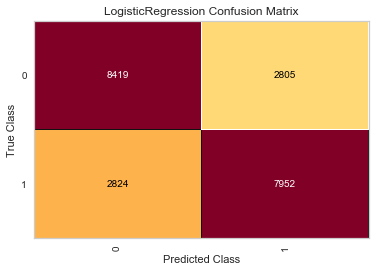

In [28]:
whoopy = model(df_train,df_test,df_predict_class)

In [29]:
whoopy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
import random
chosen_playlist = random.choice([index for index,a in enumerate(whoopy) if a == 1])

In [31]:
playlist_value = df_predict.iloc[chosen_playlist]


chosen_topic = playlist_value['playlist']

#chosen_topic = df_predict[df_predict['playlist']==playlist_value['playlist']]

In [32]:
tsp_deliverable = df_base[df_base['playlist']==chosen_topic]

In [33]:
tsp = tsp_deliverable.sort_values(by='valence',ascending=False)
tsp = tsp.reset_index()

## Playlist Energy Valence Curve

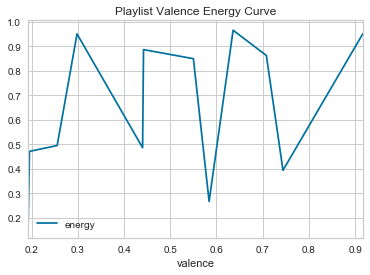

In [34]:
tsp.plot.line(x='valence',y='energy',title='Playlist Valence Energy Curve')


In [35]:
import requests
import json
import pandas as pd
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication


cid = '049ade7215e54c63a2b628f3784dc407'
secret = '171ef0fc408745e88dd5b99b83291146'
redirect_uri = 'http://google.com/'
username = 'name'



#Authentication

scope = 'playlist-modify-private'
token_playlist = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_playlist:
    
    sp_playlist = spotipy.Spotify(auth=token_playlist)

else:
    
    print("Can't get token for", username)
    
#Authentication

scope = 'user-read-private'

token_user = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_user:
    sp_user = spotipy.Spotify(auth=token_user)
else:
    print("Can't get token for", username)
    


Enter the URL you were redirected to: https://www.google.com/?code=AQBPEHYDObmXwvPZdF5WjOAsdPLG1j8cnExDo0Bv7EWb2kHbMFHn6IJiM9UpTB__-k_GYnW0o86XI-gs5eaS7O6zgaC4-42kJugV3b2mf_Z92im3UdGhyw1qYZkXt72CD72H5Gf9THcjjU1H5VEVKUsNPuWkE5h0Zd4oz4cRr1pbmE4N-qA-RqSoIIPqOlo
Enter the URL you were redirected to: https://www.google.com/?code=AQBCR2MQlbdkFTmOqrdkWinitdE004NIMS7MD9VhbD7Df2stRGdJRHT8ksVMzxHave45M28iebblUrxSzsNA0ALdP54WL7MkzJeZou18es5F_iNj68vhhtgagFaRm_szNy_h9UozoUBXP0hHTpF_TgMRQGBpmY9ecfmh47RecO6D1CwLp3tbQ8c


In [36]:
def get_user_id(url):
    try:
        resp = requests.get(url,headers={'Authorization': 'Bearer ' + token_user},
                           )
        
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as err:
        
        print(err)
        
    
    response = resp.json()
    userid = response['id']
    
    return userid

user_id = get_user_id('https://api.spotify.com/v1/me')

In [37]:
identification = user_id
identification

'12182523216'

In [38]:
tsp

,index,playlist,track_uri,track_name_x,artist_name,track_name_y,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness,lyrics
0,107,Topic15,4KZhtPDuruUOzBPsgeGO7g,physical - original radio version,Alcazar,physical - original radio version,0.002630,0.634,0.951,0.917,0.000120,11.0,0.0,0.3240,0.0604,4.0,126.998,-3.089,hear fleeting butterfly denying love highlife ...
1,100,Topic15,6UxPXIPr2IGe4sPzm0PZFn,three roses,America,three roses,0.504000,0.758,0.394,0.744,0.006040,11.0,0.0,0.0932,0.0304,4.0,124.404,-12.577,sit fireside book hand lazy dog sittin watchin...
2,111,Topic15,2V78GOx2LKUTlED8qDUCUn,stomping the roses,David Archuleta,stomping the roses,0.003630,0.641,0.862,0.708,0.000014,1.0,1.0,0.1410,0.0268,4.0,121.970,-4.509,waste time mindless watch charade occur age ca...
3,104,Topic15,5yVndvD6teYXb6BPj2Riyl,dirt,The Bouncing Souls,dirt,0.009780,0.321,0.965,0.636,0.004870,2.0,1.0,0.2230,0.0670,4.0,153.059,-3.328,wan dirty clothe wear dirty street feel alive ...
4,105,Topic15,5L6i0PCY85kMXfhyEdHCOc,bright blue tie,The Fiery Furnaces,bright blue tie,0.826000,0.669,0.267,0.584,0.000000,9.0,0.0,0.1250,0.0864,4.0,139.293,-15.234,day town king dress suit bright blue tie match...
5,110,Topic15,5jaQLvFqJizFMle74VT0ID,devil girl - 25th anniversary re-mastered edition,Better Than Ezra,devil girl - 25th anniversary re-mastered edition,0.002570,0.627,0.849,0.550,0.000010,4.0,0.0,0.6210,0.0810,4.0,134.704,-6.222,write kevin griffin transcribe ferlen david ii...
6,101,Topic15,4hhU2GrQuQtD0EIWp56FVs,bleed for you,Acumen Nation,bleed for you,0.000140,0.599,0.886,0.442,0.473000,11.0,0.0,0.0842,0.0396,4.0,112.013,-6.508,stare space barely table chew swallow spit for...
7,102,Topic15,5UocyivmLqLF5f7UqCEEi1,the torture never stops - live,Dweezil Zappa,the torture never stops - live,0.608000,0.455,0.486,0.440,0.001220,7.0,1.0,0.7140,0.0340,4.0,116.944,-7.708,fly green buzzin dungeon despair prisoner grum...
8,108,Topic15,4FvW8LcUhNPTc3sLLqtyti,delusions of grandeur,From Autumn To Ashes,delusions of grandeur,0.000009,0.489,0.950,0.298,0.095900,7.0,0.0,0.2800,0.0711,4.0,136.010,-5.826,press business comfort expensive hot shot pige...
9,109,Topic15,0qIADKlAoLxp0cZzK7LN9x,hem of his garment (feat. dido),Faithless,hem of his garment (feat. dido),0.774000,0.605,0.495,0.255,0.001780,11.0,0.0,0.1560,0.0468,3.0,136.933,-10.992,touch hem garment hard stern cruel touch hem g...


In [39]:
words = df_topics[df_topics['playlist']==tsp['playlist'][0]]

theme = ' '.join(words['words'].values).capitalize()

In [40]:
playlist = sp_playlist.user_playlist_create(identification,f'TSP_Ideal: {theme}', public=False, description="Ideal TSP")


sp_playlist.user_playlist_add_tracks(identification,playlist['id'],tsp['track_uri'], position=None)

{'snapshot_id': 'MyxjMTFkYWQyYjZmMmE3ZjMyNjQ1MmM5MWIwMWEzY2UxYjM0NTZiYjdj'}